# <p style="background-color:  #00008B; font-family:newtimeroman;font-size:180%;color:#FFF9ED;text-align:center;border-radius:80px 20px;"><b>Logistic Regression Project<img style="width: 70x;"  style="position: absolute; right: 5px; top: 60%; transform: translateY(-70%);"> </div> 

<p style="text-align: center;"><img src="1.jpg" style="width: 100%; height: 500px; object-fit: cover;">
</p>

<p style="background-color: darkviolet; font-family: newtimeroman; font-size: 300%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b>Raisin Class Prediction</b>
<img src="R1.png" style="width: 150px; vertical-align: left; margin-left: 20px; float:right;" alt="Icon">
<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 
</p>


**Data Set Information:**

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


**Attribute Information:**

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Exploratory Data Analysis and Visualization

In [107]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [108]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


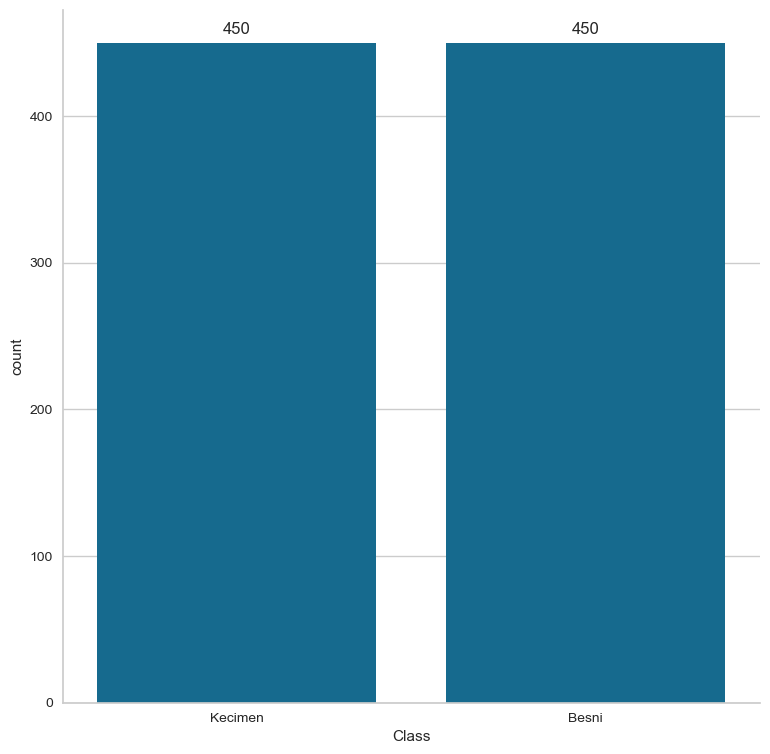

In [111]:
ax = sns.countplot(x=df["Class"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

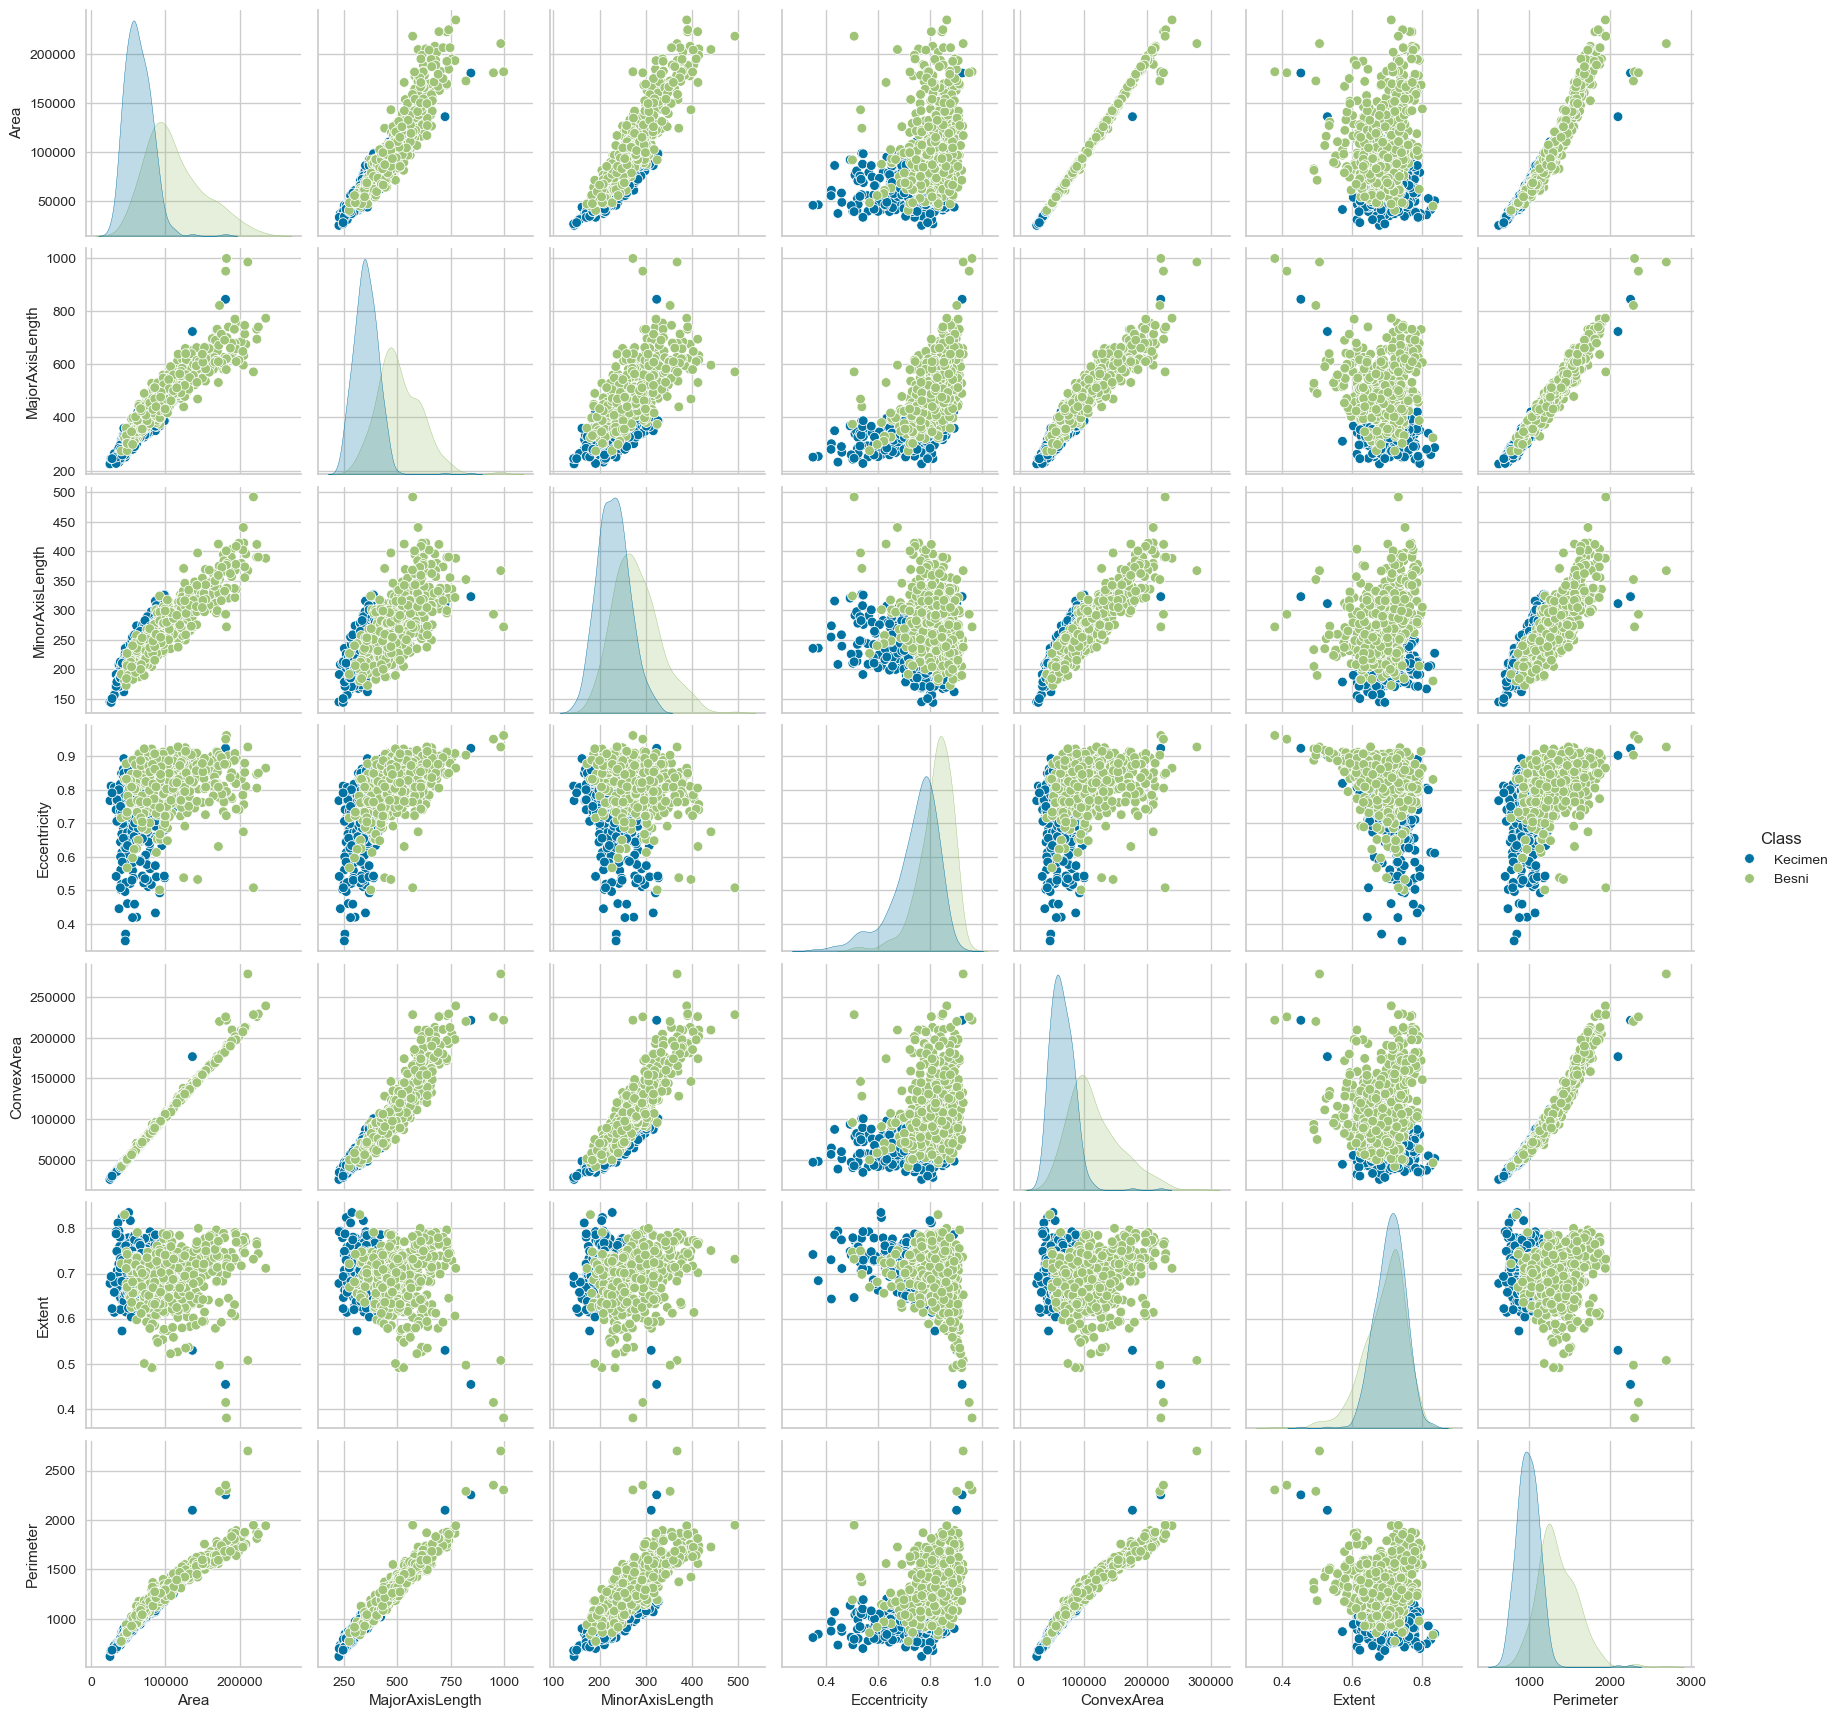

In [112]:
sns.pairplot(df, hue = "Class");

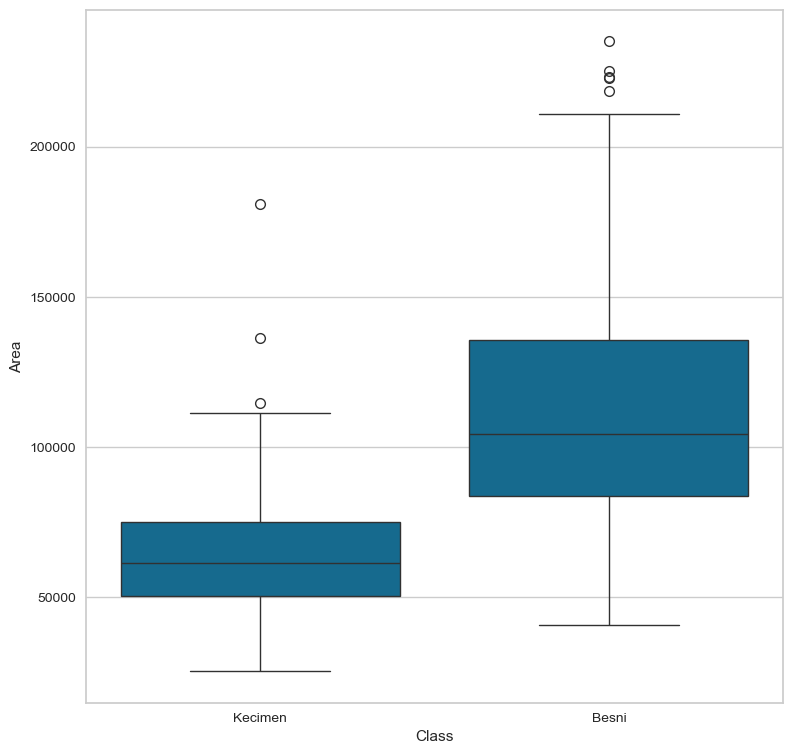

In [113]:
sns.boxplot(x="Class", y = "Area", data = df);

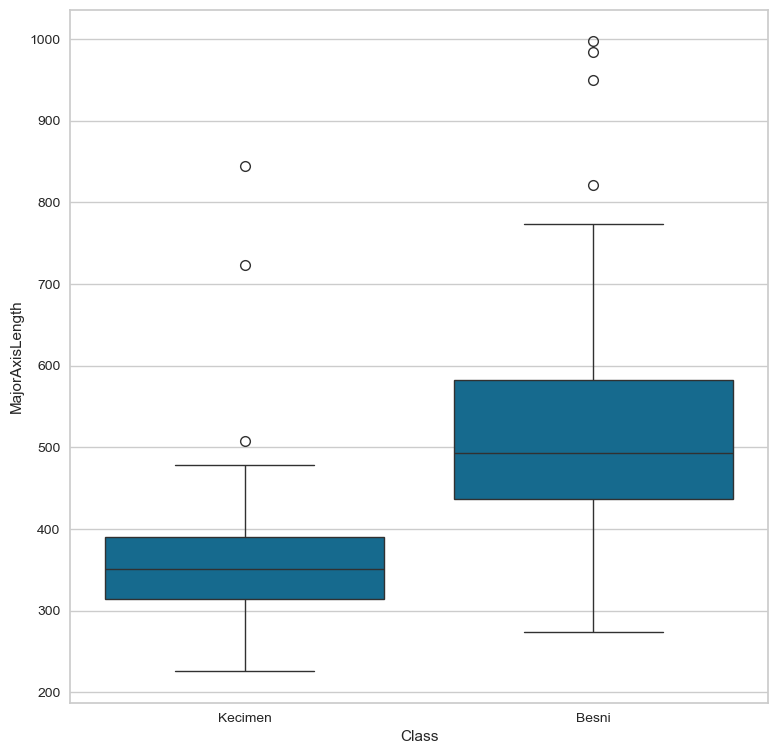

In [114]:
sns.boxplot(x="Class", y = "MajorAxisLength", data = df);

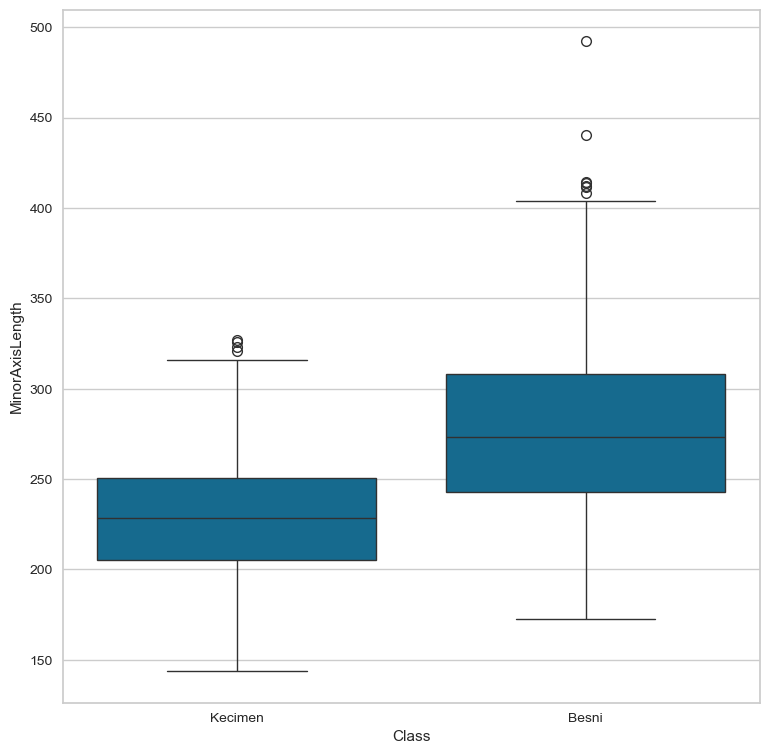

In [115]:
sns.boxplot(x="Class", y = "MinorAxisLength", data = df);

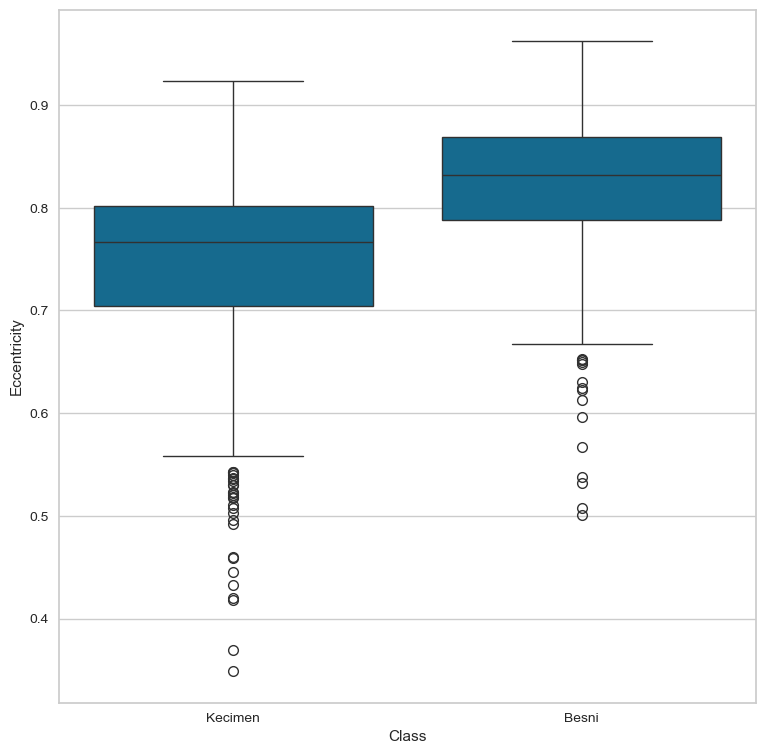

In [116]:
sns.boxplot(x="Class", y = "Eccentricity", data = df);

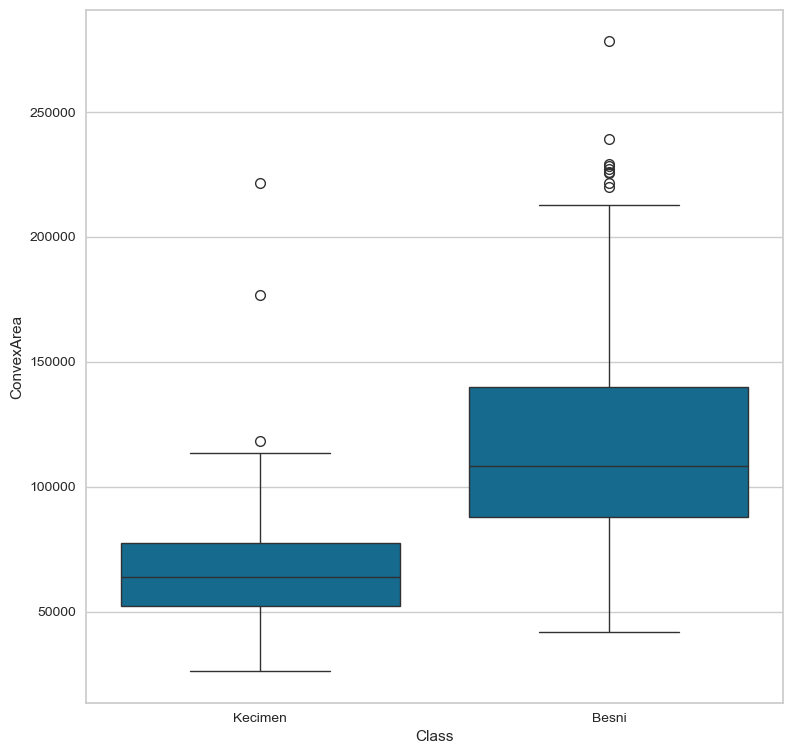

In [117]:
sns.boxplot(x="Class", y = "ConvexArea", data = df);

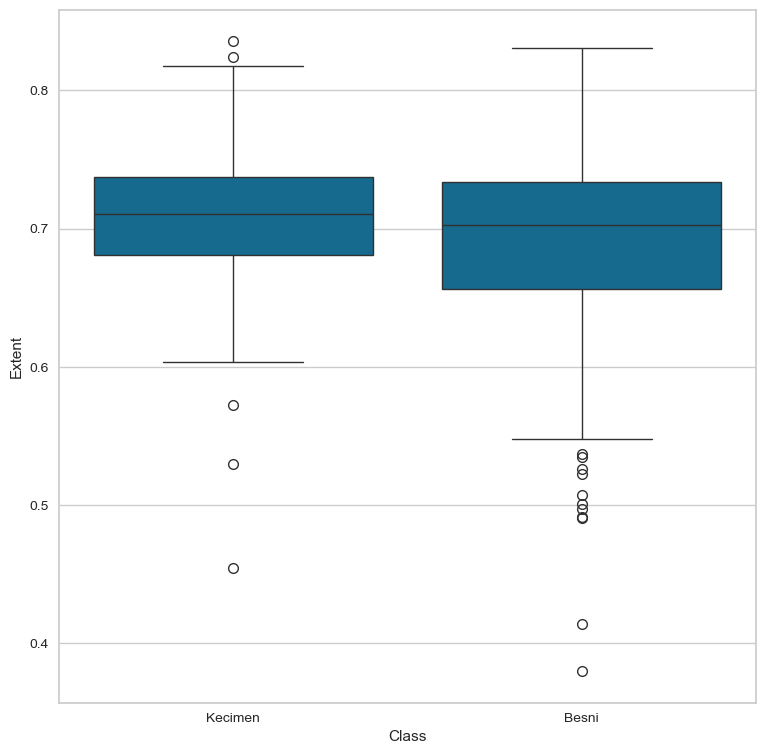

In [118]:
sns.boxplot(x="Class", y = "Extent", data = df);

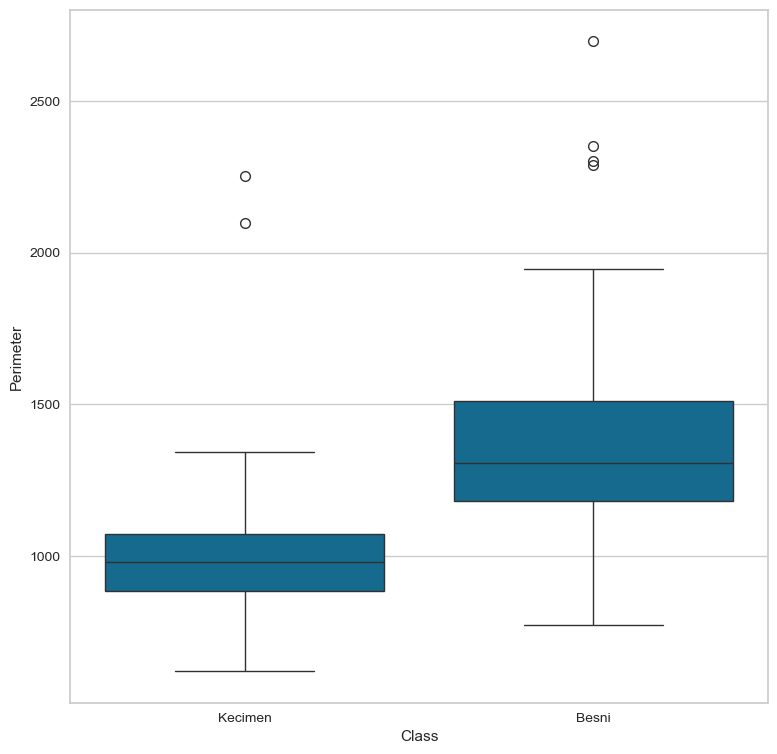

In [119]:
sns.boxplot(x="Class", y = "Perimeter", data = df);

<Axes: >

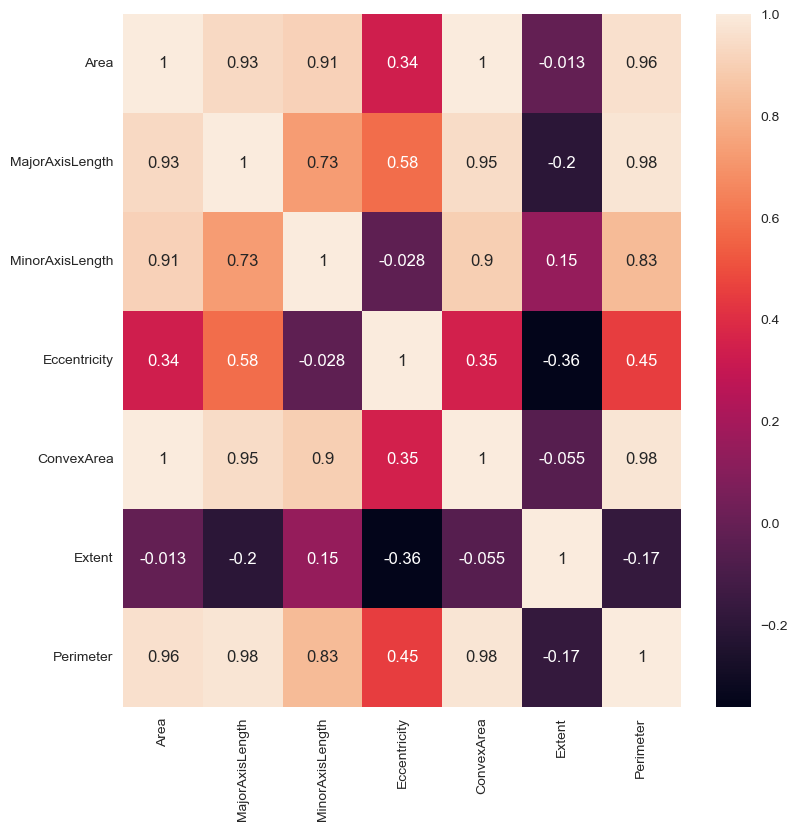

In [120]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [121]:
df = df.drop('ConvexArea', axis=1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,0.659,1258.548,Besni


<Axes: >

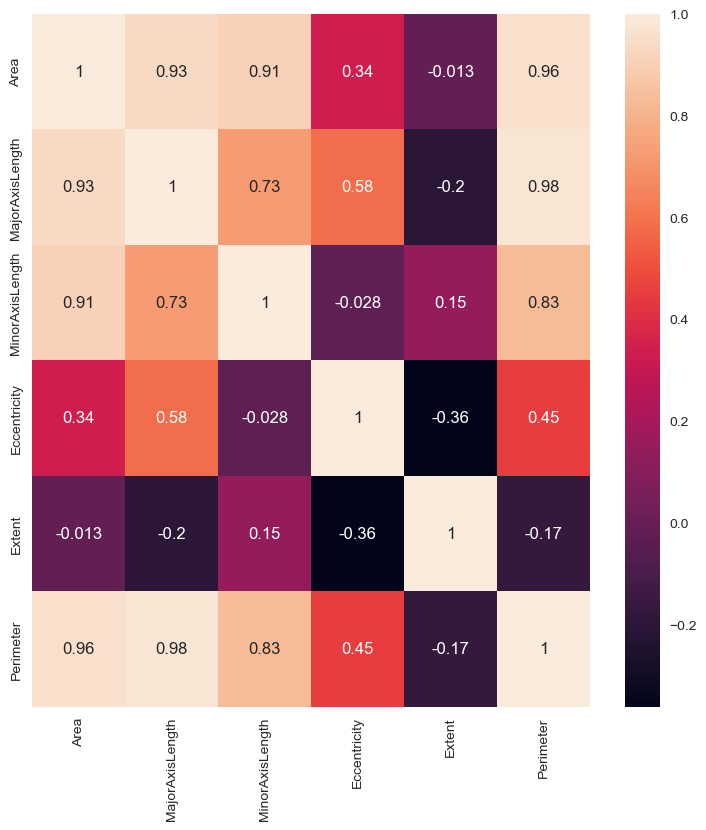

In [122]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Train | Test Split and Scaling

In [123]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=y)

In [126]:
scaler = StandardScaler()

In [127]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
log_model = LogisticRegression()

In [130]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [131]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,0.793,1073.251,Kecimen


In [132]:
log_model.coef_

array([[-0.69670278, -1.0257765 ,  1.02789085,  0.11511067,  0.20191918,
        -2.54383168]])

In [133]:
log_model.intercept_

array([-0.52104145])

In [134]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besn

In [135]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[4.98922300e-01, 5.01077700e-01],
       [2.22487453e-01, 7.77512547e-01],
       [8.99698766e-01, 1.00301234e-01],
       [9.99840683e-01, 1.59316762e-04],
       [6.44156719e-01, 3.55843281e-01],
       [1.25910602e-02, 9.87408940e-01],
       [4.01227507e-01, 5.98772493e-01],
       [8.93197115e-01, 1.06802885e-01],
       [2.56172316e-02, 9.74382768e-01],
       [4.94659241e-01, 5.05340759e-01],
       [9.99791639e-01, 2.08361487e-04],
       [3.54220589e-01, 6.45779411e-01],
       [9.82617834e-01, 1.73821660e-02],
       [8.07581702e-01, 1.92418298e-01],
       [8.49414394e-02, 9.15058561e-01],
       [9.96523202e-01, 3.47679842e-03],
       [3.14486692e-01, 6.85513308e-01],
       [8.45451542e-01, 1.54548458e-01],
       [3.35493295e-01, 6.64506705e-01],
       [4.22788374e-01, 5.77211626e-01],
       [1.91765729e-01, 8.08234271e-01],
       [1.28639982e-01, 8.71360018e-01],
       [9.26225582e-01, 7.37744179e-02],
       [9.99999762e-01, 2.38069571e-07],
       [1.552574

In [136]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

array([[0.5 , 0.5 ],
       [0.22, 0.78],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.64, 0.36],
       [0.01, 0.99],
       [0.4 , 0.6 ],
       [0.89, 0.11],
       [0.03, 0.97],
       [0.49, 0.51],
       [1.  , 0.  ],
       [0.35, 0.65],
       [0.98, 0.02],
       [0.81, 0.19],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.31, 0.69],
       [0.85, 0.15],
       [0.34, 0.66],
       [0.42, 0.58],
       [0.19, 0.81],
       [0.13, 0.87],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.29, 0.71],
       [0.04, 0.96],
       [0.06, 0.94],
       [0.88, 0.12],
       [0.8 , 0.2 ],
       [0.93, 0.07],
       [0.08, 0.92],
       [0.23, 0.77],
       [0.74, 0.26],
       [0.94, 0.06],
       [0.16, 0.84],
       [0.02, 0.98],
       [0.4 , 0.6 ],
       [1.  , 0.  ],
       [0.39, 0.61],
       [0.79, 0.21],
       [0.02, 0.98],
       [0.54, 0.46],
       [0.19, 0.81],
       [0.06, 0.94],
       [0.06, 0.94],
       [0.99, 0.01],
       [1.  ,

In [137]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class
379,79100,413.496,246.405,0.803,0.655,1113.607,Kecimen
279,79510,380.719,267.034,0.713,0.732,1075.307,Kecimen
713,104728,495.672,272.687,0.835,0.730,1316.398,Besni
580,206720,713.473,373.643,0.852,0.781,1866.091,Besni
726,86658,439.229,258.304,0.809,0.700,1184.581,Besni
...,...,...,...,...,...,...,...
9,64380,366.965,227.772,0.784,0.664,981.544,Kecimen
637,160583,630.645,326.245,0.856,0.752,1646.559,Besni
500,143386,469.277,397.310,0.532,0.750,1422.014,Besni
541,193032,661.149,376.432,0.822,0.631,1744.271,Besni


In [138]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class,pred_proba
379,79100,413.496,246.405,0.803,0.655,1113.607,Kecimen,0.501
279,79510,380.719,267.034,0.713,0.732,1075.307,Kecimen,0.778
713,104728,495.672,272.687,0.835,0.730,1316.398,Besni,0.100
580,206720,713.473,373.643,0.852,0.781,1866.091,Besni,0.000
726,86658,439.229,258.304,0.809,0.700,1184.581,Besni,0.356
...,...,...,...,...,...,...,...,...
9,64380,366.965,227.772,0.784,0.664,981.544,Kecimen,0.822
637,160583,630.645,326.245,0.856,0.752,1646.559,Besni,0.002
500,143386,469.277,397.310,0.532,0.750,1422.014,Besni,0.207
541,193032,661.149,376.432,0.822,0.631,1744.271,Besni,0.001


In [139]:
test_data["pred"] = y_pred
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class,pred_proba,pred
379,79100,413.496,246.405,0.803,0.655,1113.607,Kecimen,0.501,Kecimen
279,79510,380.719,267.034,0.713,0.732,1075.307,Kecimen,0.778,Kecimen
713,104728,495.672,272.687,0.835,0.730,1316.398,Besni,0.100,Besni
580,206720,713.473,373.643,0.852,0.781,1866.091,Besni,0.000,Besni
726,86658,439.229,258.304,0.809,0.700,1184.581,Besni,0.356,Besni
...,...,...,...,...,...,...,...,...,...
9,64380,366.965,227.772,0.784,0.664,981.544,Kecimen,0.822,Kecimen
637,160583,630.645,326.245,0.856,0.752,1646.559,Besni,0.002,Besni
500,143386,469.277,397.310,0.532,0.750,1422.014,Besni,0.207,Besni
541,193032,661.149,376.432,0.822,0.631,1744.271,Besni,0.001,Besni


In [140]:
test_data.sample(20,random_state=11)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class,pred_proba,pred
143,50445,308.359,208.855,0.736,0.723,851.632,Kecimen,0.964,Kecimen
530,90559,473.576,246.920,0.853,0.673,1328.744,Besni,0.070,Besni
339,44081,328.587,173.347,0.850,0.638,867.003,Kecimen,0.895,Kecimen
685,102868,430.026,312.973,0.686,0.718,1251.802,Besni,0.408,Besni
426,56589,343.935,213.133,0.785,0.660,931.451,Kecimen,0.883,Kecimen
484,153824,536.607,369.286,0.726,0.739,1582.146,Besni,0.018,Besni
538,145693,591.180,321.431,0.839,0.649,1595.364,Besni,0.003,Besni
502,71639,400.414,231.620,0.816,0.642,1101.879,Besni,0.505,Kecimen
720,66793,362.231,236.404,0.758,0.684,1024.169,Besni,0.795,Kecimen
379,79100,413.496,246.405,0.803,0.655,1113.607,Kecimen,0.501,Kecimen


## Model Performance

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [142]:
confusion_matrix(y_test, y_pred)

array([[55, 13],
       [ 1, 66]], dtype=int64)

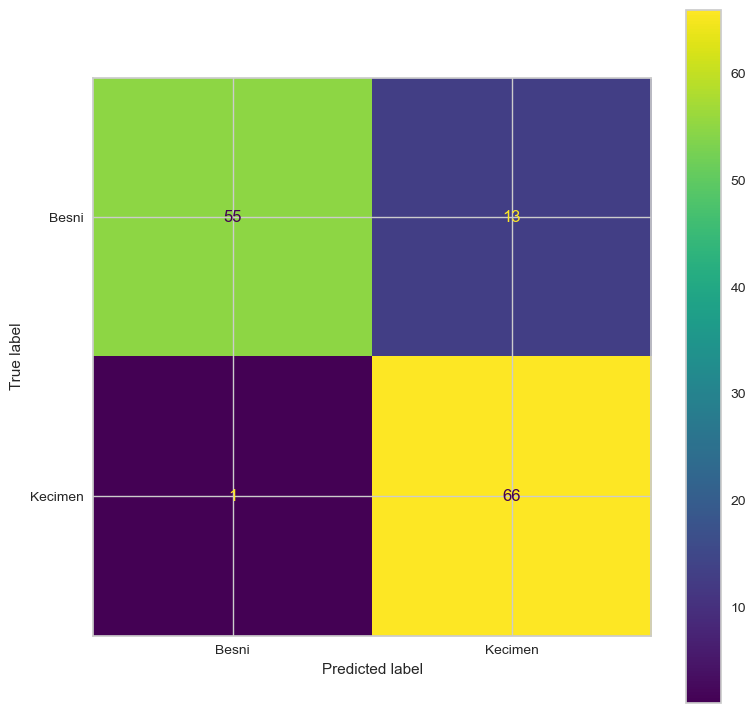

In [143]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

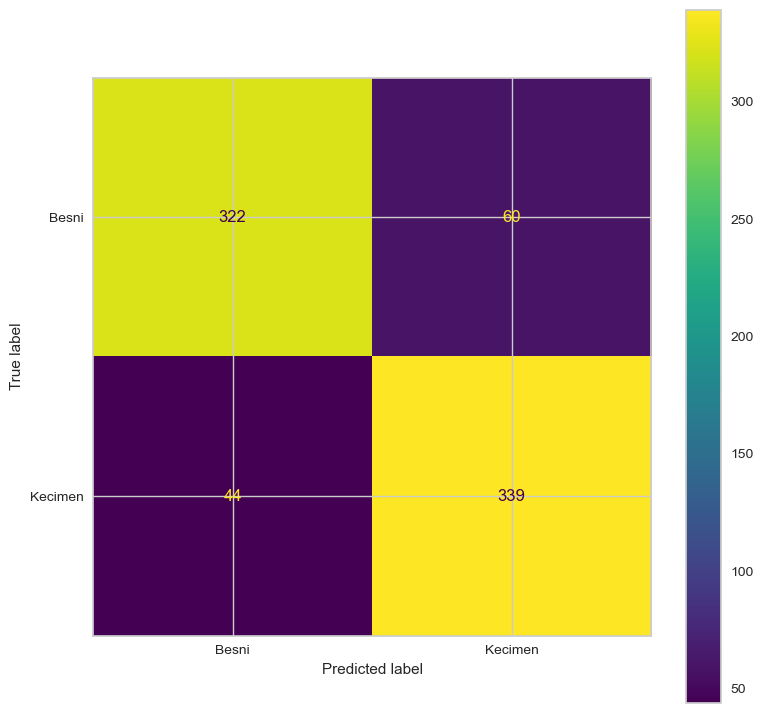

In [144]:
ConfusionMatrixDisplay.from_estimator(log_model, X_train_scaled, y_train);

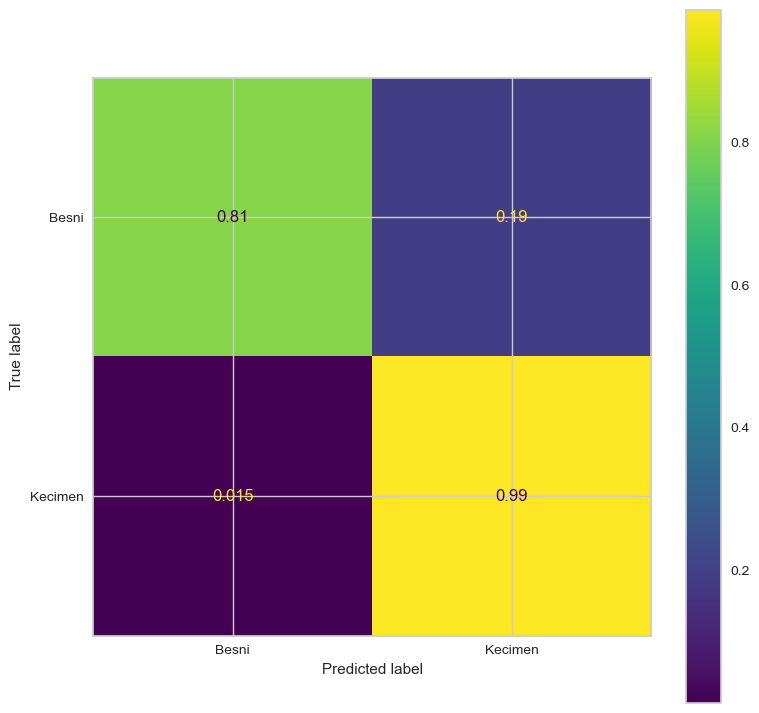

In [145]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='true');## Oransal olarak yorumlamak için

In [146]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train,y_train_pred))

In [147]:
eval_metric(log_model,X_train_scaled,y_train,X_test_scaled,y_test)

Test_Set
[[55 13]
 [ 1 66]]
              precision    recall  f1-score   support

       Besni       0.98      0.81      0.89        68
     Kecimen       0.84      0.99      0.90        67

    accuracy                           0.90       135
   macro avg       0.91      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135


Train_Set
[[322  60]
 [ 44 339]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       382
     Kecimen       0.85      0.89      0.87       383

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



### Cross Validate

In [148]:
from sklearn.model_selection import cross_validate

In [149]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [150]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", 
                                                                   "precision_weighted",
                                                                  "recall_weighted",
                                                                  "f1_weighted"], cv = 10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.864
test_precision_weighted   0.867
test_recall_weighted      0.864
test_f1_weighted          0.864
dtype: float64

In [151]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_besni"] = y_pred_proba[:,0]
test_data["pred_proba_kecimen"] = y_pred_proba[:,1]
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,Class,pred,pred_proba_besni,pred_proba_kecimen
794,105053,490.410,277.084,0.825,0.670,1297.279,Besni,Besni,0.893,0.107
500,143386,469.277,397.310,0.532,0.750,1422.014,Besni,Besni,0.793,0.207
46,69708,375.447,239.133,0.771,0.727,1022.568,Kecimen,Kecimen,0.192,0.808
267,68253,388.455,224.732,0.816,0.746,1042.257,Kecimen,Kecimen,0.270,0.730
655,69746,370.560,241.914,0.758,0.713,1027.513,Besni,Kecimen,0.195,0.805
284,72447,401.742,231.537,0.817,0.709,1055.302,Kecimen,Kecimen,0.335,0.665
324,65495,365.319,230.526,0.776,0.698,989.581,Kecimen,Kecimen,0.164,0.836
499,100319,480.779,267.669,0.831,0.640,1289.209,Besni,Besni,0.899,0.101
471,120255,471.814,326.546,0.722,0.724,1322.814,Besni,Besni,0.796,0.204
463,45051,323.589,180.070,0.831,0.831,836.625,Besni,Kecimen,0.035,0.965


### GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
log_model = LogisticRegression(max_iter=5000)

In [154]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty": penalty, 
             "C":C}

In [155]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv = 10)

In [156]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [157]:
grid_model.best_params_

{'C': 0.8858667904100825, 'penalty': 'l2'}

In [158]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni'

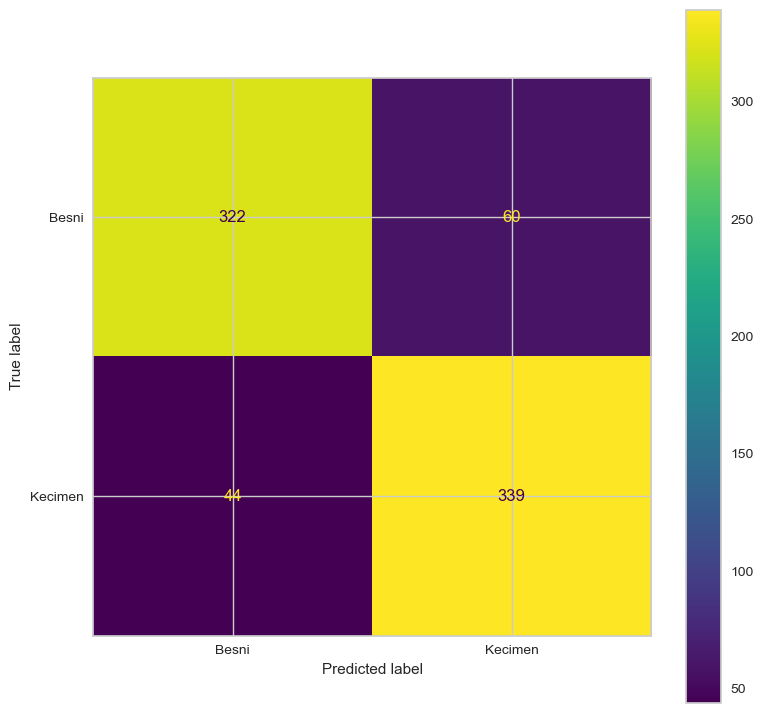

In [159]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_train_scaled, y_train);

#Train seti

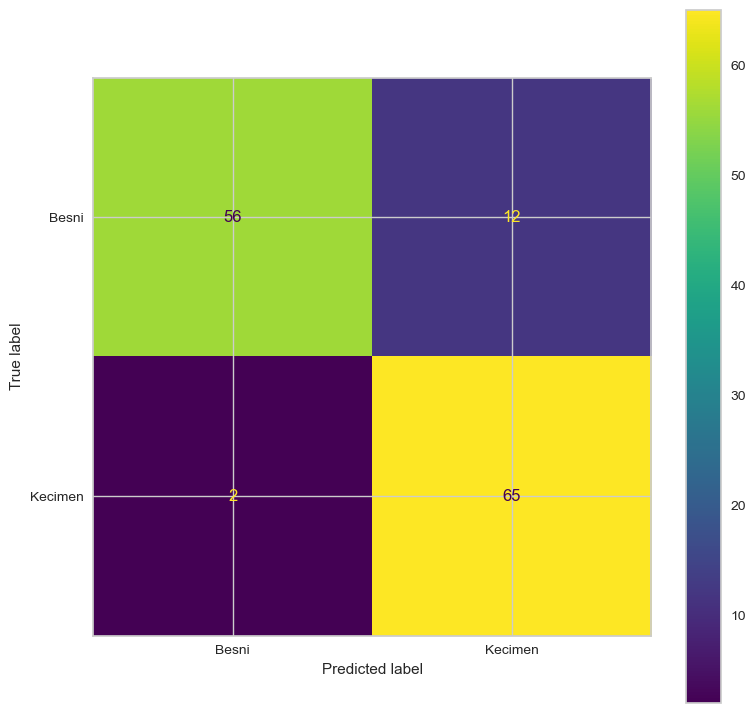

In [160]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaled, y_test);

#Test Seti

In [161]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56 12]
 [ 2 65]]
              precision    recall  f1-score   support

       Besni       0.97      0.82      0.89        68
     Kecimen       0.84      0.97      0.90        67

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135


Train_Set
[[322  60]
 [ 44 339]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       382
     Kecimen       0.85      0.89      0.87       383

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [162]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve

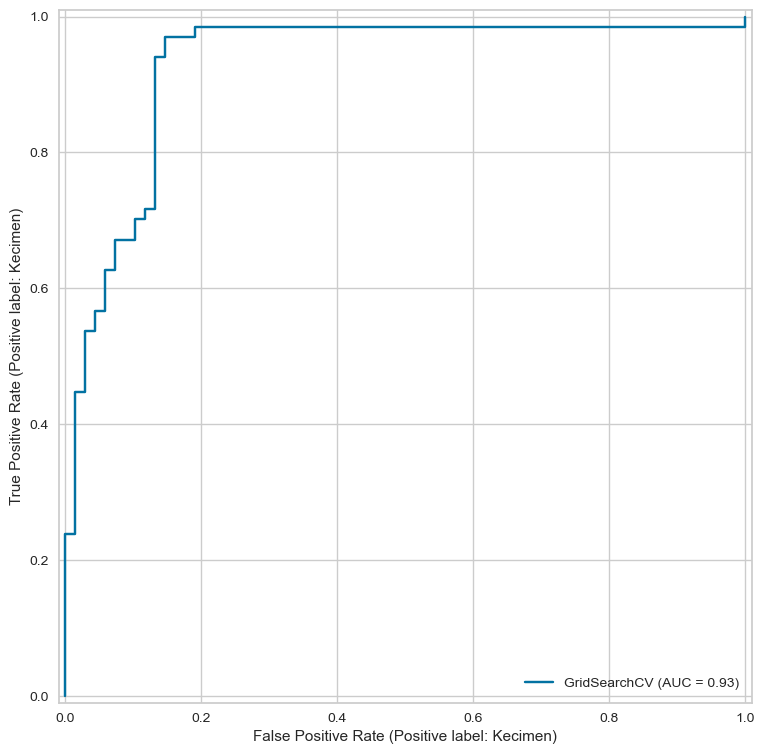

In [163]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test);

In [164]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9297629499561018

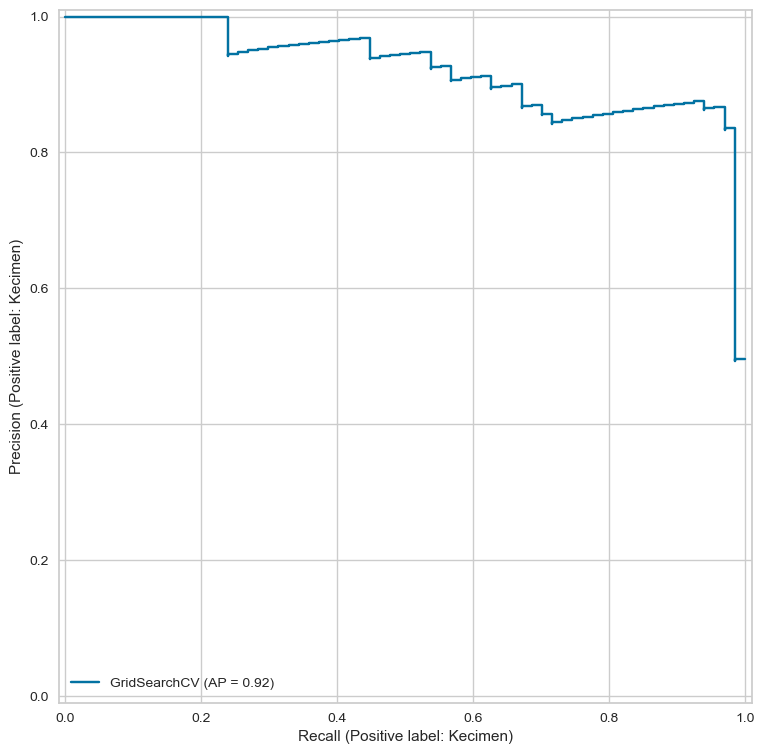

In [165]:
PrecisionRecallDisplay.from_estimator(grid_model,X_test_scaled,y_test);

# Final Model and Deployment

## Conclusion 

In [166]:
scaler = StandardScaler().fit(X)

In [167]:
import pickle
pickle.dump(scaler, open("scaler_raisin", "wb"))

In [168]:
X_scaled = scaler.transform(X)

In [169]:
grid_model.best_params_

{'C': 0.8858667904100825, 'penalty': 'l2'}

In [170]:
final_model = LogisticRegression(C =  0.8858667904100825, penalty = 'l2').fit(X_scaled, y)

In [171]:
pickle.dump(final_model,open("final_model_raisin","wb"))

## New Observation

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [173]:
my_dict = {'Area':[27890, 130942, 40390],
           'MajorAxisLength':[301.103, 706.540, 450.500],
           'MinorAxisLength':[190.800, 390.800, 420.275],
           'Eccentricity':[0.645, 0.350, 0.80],
           'Extent':[0.795, 0.571, 0.400],
           'Perimeter':[2497.550, 506.067, 1111.809]
          }

In [174]:
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter
0,27890,301.103,190.800,0.645,0.795,2497.550
1,130942,706.540,390.800,0.350,0.571,506.067
2,40390,450.500,420.275,0.800,0.400,1111.809


In [175]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [176]:
sample_scaled = scaler_raisin.transform(sample)
sample_scaled

array([[-1.53703066, -1.11948121, -1.27475385, -1.51262705,  1.78695315,
         4.86690086],
       [ 1.10665439,  2.37655024,  2.72835878, -4.78066538, -2.40478225,
        -2.4115872 ],
       [-1.21635699,  0.16875004,  3.31831751,  0.20447783, -5.60472312,
        -0.19771647]])

In [177]:
final_model = pickle.load(open('final_model_raisin', 'rb'))

In [178]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [179]:
sample["pred"] = predictions
sample["pred_proba_besni"] = predictions_proba[:,0]
sample["pred_proba_kecimen"] = predictions_proba[:,1]
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Extent,Perimeter,pred,pred_proba_besni,pred_proba_kecimen
0,27890,301.103,190.800,0.645,0.795,2497.550,Besni,1.000,0.000
1,130942,706.540,390.800,0.350,0.571,506.067,Kecimen,0.006,0.994
2,40390,450.500,420.275,0.800,0.400,1111.809,Kecimen,0.167,0.833
